In [2]:
# importing modules
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

In [3]:
# building dataset
inputs = np.array([[1, 0],
                   [-1, 0],
                   [0, 1],
                   [0, -1],
                   [2, 0],
                   [-2, 0],
                   [0, 2],
                   [0, -2],
                   [0, 0],
                   [2, 2],
                   [2, -2],
                   [-2, 2],
                   [2, -2],
                   [4, 0],
                   [-4, 0],
                   [0, 4],
                   [0, -4]])
actual_outputs = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
actual_outputs = actual_outputs[:, np.newaxis]
# size of the batches
batch_size = inputs.shape[0]
# number of classes
num_classes = 2

### تابعی که برای رسم مرزها استفاده می‌شود
سایت های استفاده شده برای این پلات به شرح زیر هستند

https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/


In [4]:
# plot boundary function
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = cm.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels[:, 0].reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax

# 11

برای هریک از 16 حالت خواسته شده یک بار به طور جدا مدل ساخته و ترین شده است. هر حالت با تیتری مشخص شده است که نشاندهنده تعداد نرون های لایه های آن است. در سلول مربوط به ترین کردن، نموداری برای نمایش دقت برحسب ایپاک نیز وجود دارد. همچنین مرزبندی ها را نیز رسم کرده ام. بعد از آن در سل بعدی مدل را سیو کرده ام. در سل بعدی مدل را لود کرده و دوباره مرزبندی و دقت آن را نشان داده ام، زیرا من بهترین مدل ها را ذخیره کرده ام و فقط کافیست آن ها را لود کرده و نتایجش را ببینید. پس ممکن است پلات هایی که در سل ترین و سل لود میبینید متفاوت باشد و دلیل آن این است که من بارها مدل را ترین کردم تا بهترین نتیجه را ذخیره کنم که در سل لود آن را میبینید. رنگ انتخابی برای پلات مرزها به صورت گرادیان است.

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.4285 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0s 9ms/st

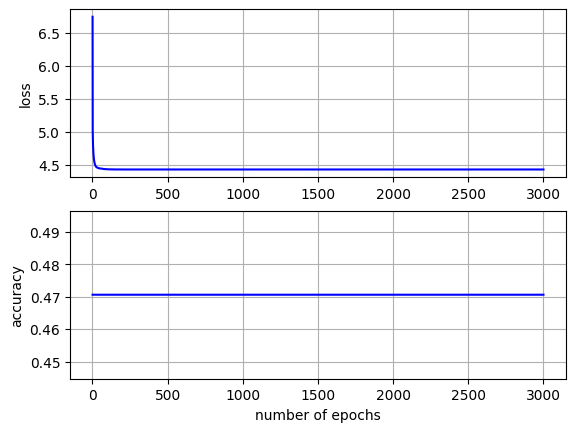

1/1 [==============================] - 0s 63ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

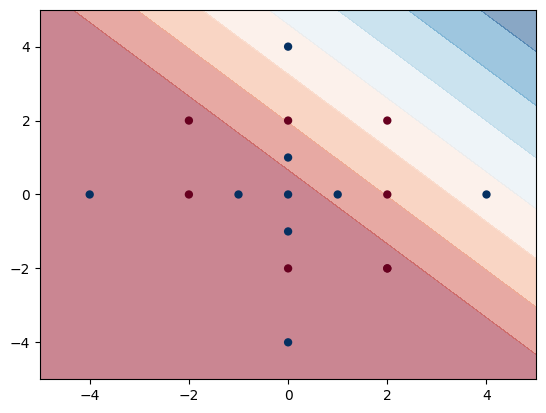

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_11.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## loading cell

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 2)                 4         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 87ms/step


accuracy: 0.47058823704719543


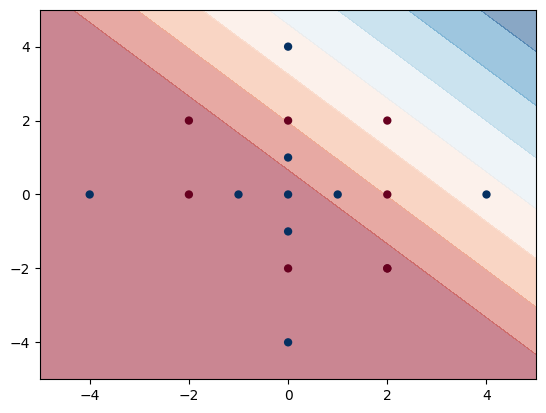

In [13]:
# loading the best model
model = load_model('my_model_11.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 12

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 1.7621 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.7615 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.7609 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.7603 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7598 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.7592 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7586 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7580 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.7574 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0s

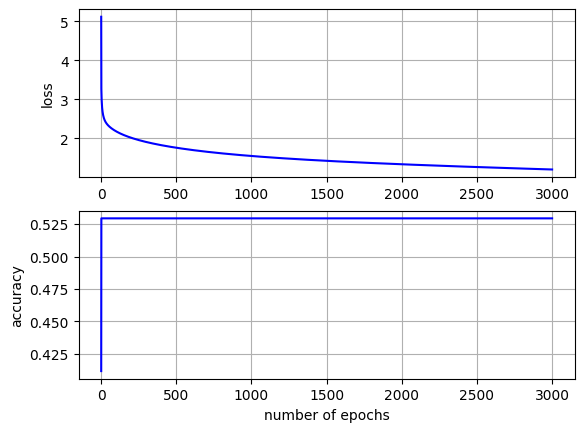

1/1 [==============================] - 0s 93ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

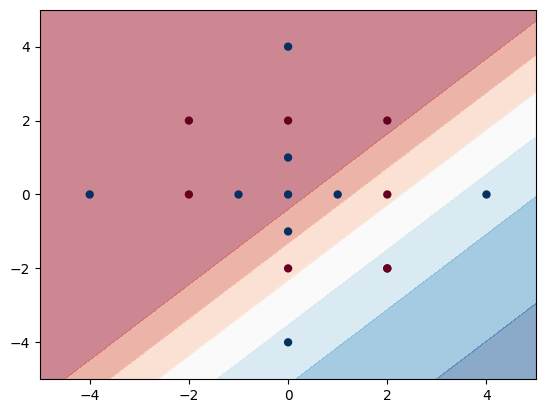

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_12.h5')

## loading cell

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
 dense_13 (Dense)            (None, 2)                 4         
                                                                 
 dense_14 (Dense)            (None, 2)                 6         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 62ms/step


accuracy: 0.529411792755127


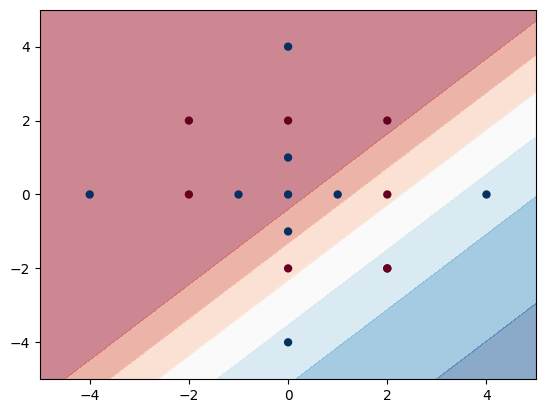

In [12]:
# loading the best model
model = load_model('my_model_12.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 13

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0

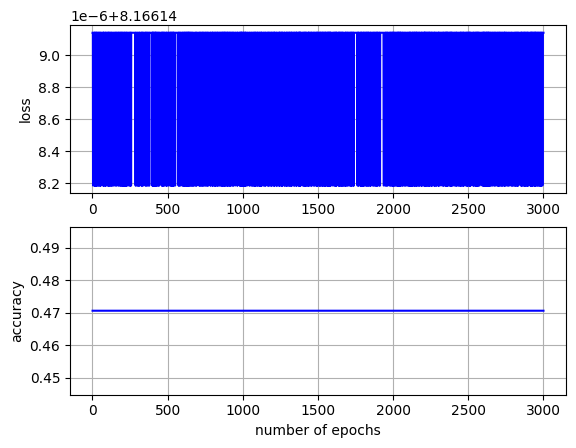

1/1 [==============================] - 0s 89ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

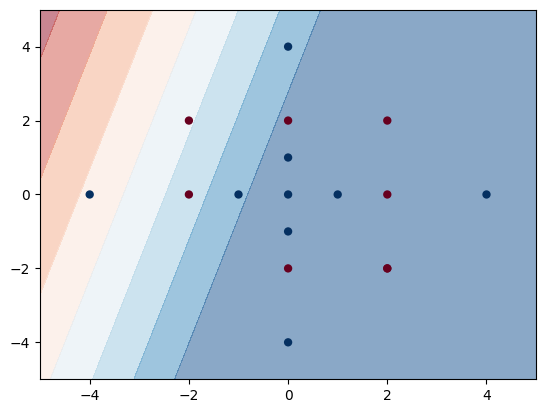

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_13.h5')

## loading cell

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
 dense_22 (Dense)            (None, 3)                 6         
                                                                 
 dense_23 (Dense)            (None, 2)                 8         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 91ms/step
accuracy: 0.529411792755127


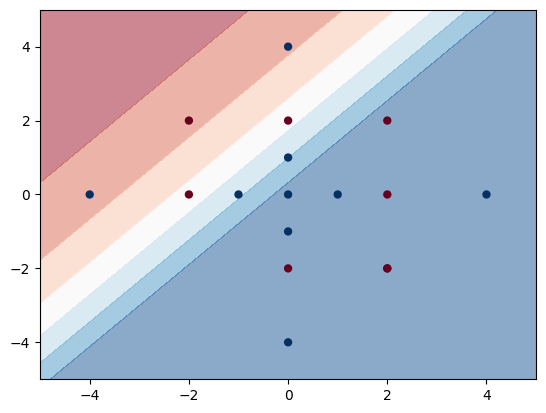

In [11]:
# loading the best model
model = load_model('my_model_13.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 14

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 8ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 13ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 9ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0s 10

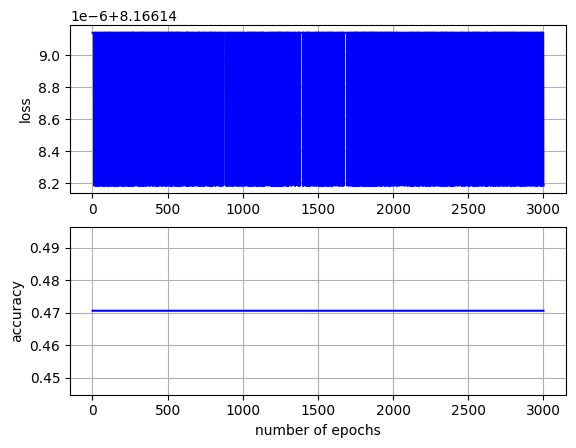

1/1 [==============================] - 0s 90ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

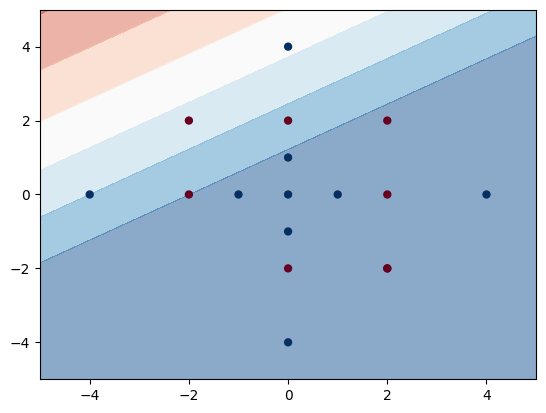

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(1, activation='relu', input_shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_14.h5')

## loading cell

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1)                 3         
                                                                 
 dense_31 (Dense)            (None, 4)                 8         
                                                                 
 dense_32 (Dense)            (None, 2)                 10        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 107ms/step
accuracy: 0.529411792755127


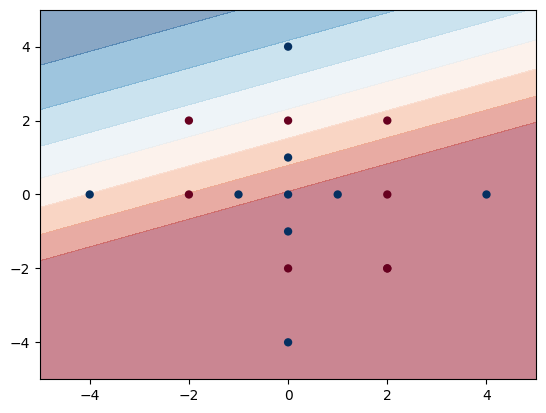

In [ ]:
# loading the best model
model = load_model('my_model_14.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

تا اینجا تعداد نرون لایه اول یکی بود و تعداد نرون های لایه دوم از 1 تا 4 تغییر می‌کرد. اینطور به نظر می‌رسد که این نوع شبکه ها فقط می‌توانند مرزهایی خطی ایجاد کنند

# 21

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 6.5047 - accuracy: 0.5882
Epoch 502/3000
1/1 [==============================] - 0s 11ms/step - loss: 6.5046 - accuracy: 0.5882
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 6.5046 - accuracy: 0.5882
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 6.5046 - accuracy: 0.5882
Epoch 505/3000
1/1 [==============================] - 0s 9ms/step - loss: 6.5045 - accuracy: 0.5882
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 6.5045 - accuracy: 0.5882
Epoch 507/3000
1/1 [==============================] - 0s 15ms/step - loss: 6.5045 - accuracy: 0.5882
Epoch 508/3000
1/1 [==============================] - 0s 12ms/step - loss: 6.5044 - accuracy: 0.5882
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 6.5044 - accuracy: 0.5882
Epoch 510/3000
1/1 [==============================] - 0s

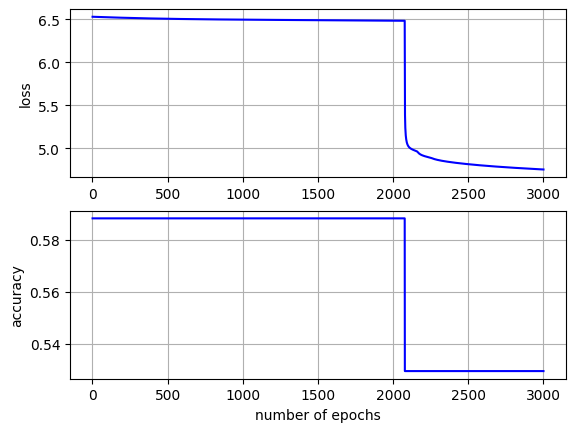

1/1 [==============================] - 0s 104ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

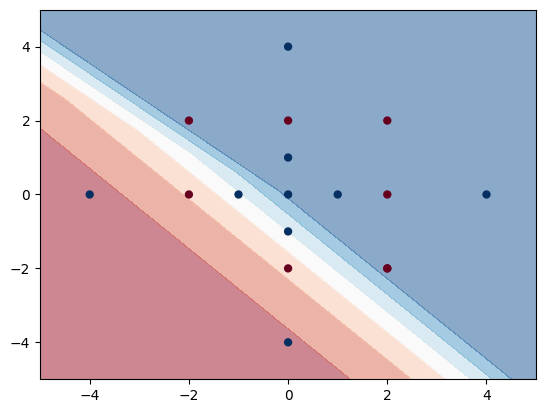

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_21.h5')

## loading cell

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 2)                 6         
                                                                 
 dense_55 (Dense)            (None, 1)                 3         
                                                                 
 dense_56 (Dense)            (None, 2)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 51ms/step
accuracy: 0.529411792755127


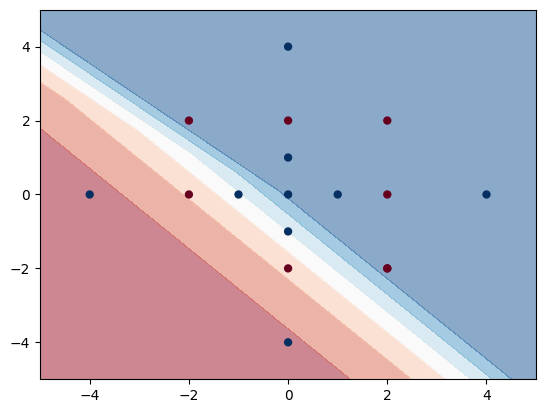

In [ ]:
# loading the best model
model = load_model('my_model_21.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 22

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 3.0801 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 9ms/step - loss: 3.0794 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 3.0788 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 13ms/step - loss: 3.0782 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 3.0775 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 3.0769 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 11ms/step - loss: 3.0763 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 13ms/step - loss: 3.0756 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 12ms/step - loss: 3.0750 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0s 

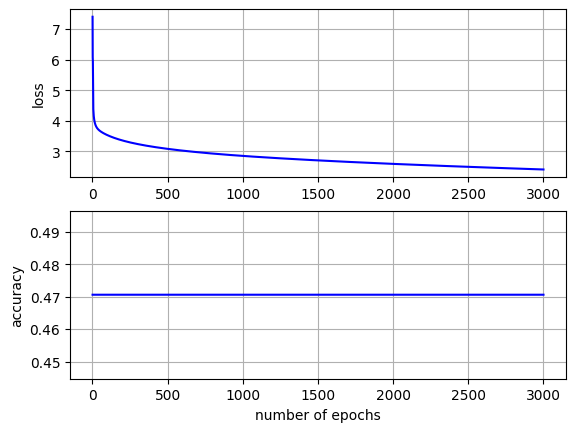

1/1 [==============================] - 0s 92ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

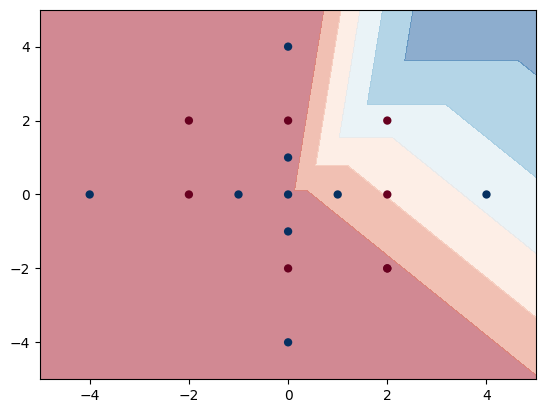

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_22.h5')

## loading cell

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 6         
                                                                 
 dense_19 (Dense)            (None, 2)                 6         
                                                                 
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 60ms/step
accuracy: 0.47058823704719543


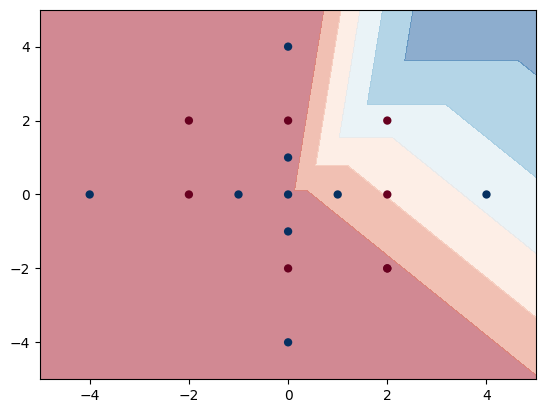

In [ ]:
# loading the best model
model = load_model('my_model_22.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 23

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step - loss: 5.3316 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3313 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 11ms/step - loss: 5.3310 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3308 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3305 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3303 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.3300 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3298 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.3295 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0

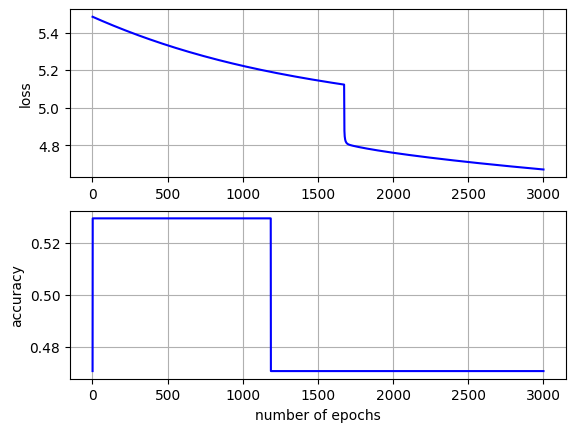

1/1 [==============================] - 0s 51ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

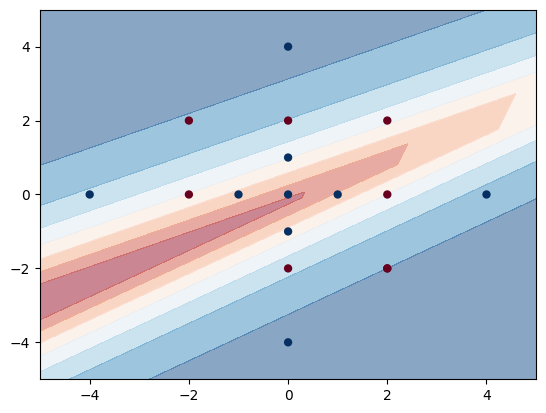

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_23.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## loading cell

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
Total params: 23 (92.00 Byte)
Trainable params: 23 (92.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 49ms/step
accuracy: 0.529411792755127


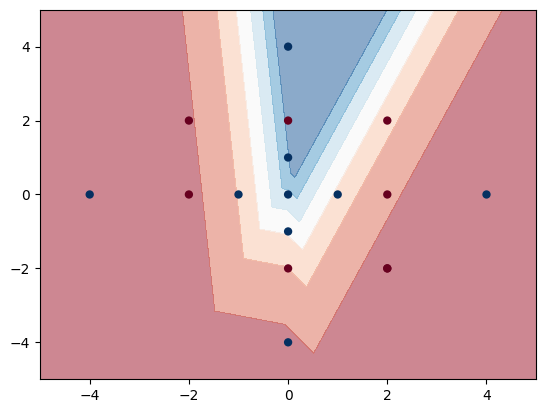

In [ ]:
# loading the best model
model = load_model('my_model_23.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 24

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 5.1936 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1932 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1928 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1924 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.1920 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1916 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.1912 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1908 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1904 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0s 

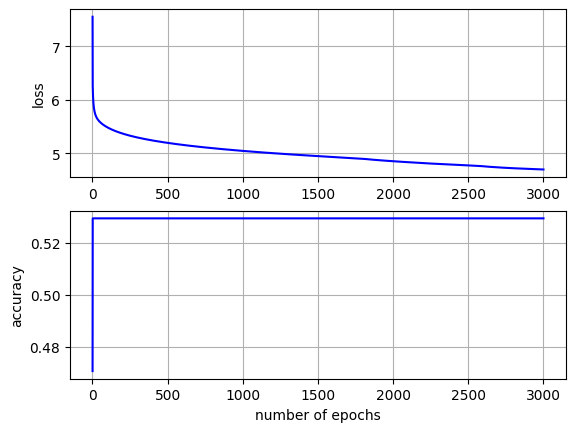

1/1 [==============================] - 0s 51ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

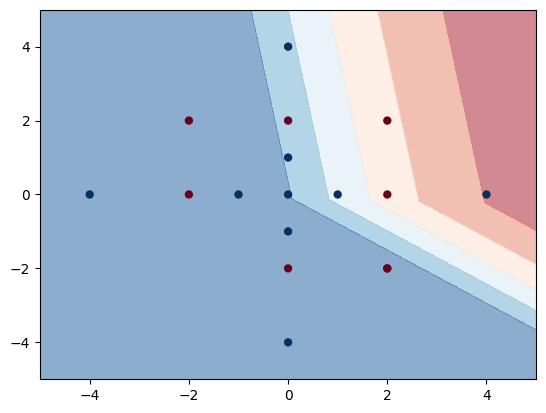

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_24.h5')

## loading cell

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 2)                 6         
                                                                 
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 86ms/step
accuracy: 0.529411792755127


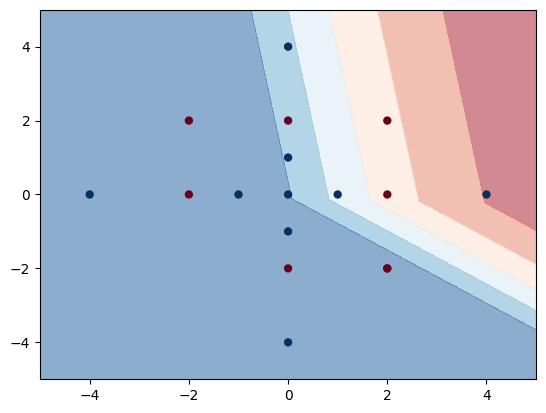

In [ ]:
# loading the best model
model = load_model('my_model_24.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 31

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 1.7860 - accuracy: 0.5882
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7853 - accuracy: 0.5882
Epoch 503/3000
1/1 [==============================] - 0s 13ms/step - loss: 1.7846 - accuracy: 0.5882
Epoch 504/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.7839 - accuracy: 0.5882
Epoch 505/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.7831 - accuracy: 0.5882
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7824 - accuracy: 0.5882
Epoch 507/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.7817 - accuracy: 0.5882
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7810 - accuracy: 0.5882
Epoch 509/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7803 - accuracy: 0.5882
Epoch 510/3000
1/1 [==============================] - 0

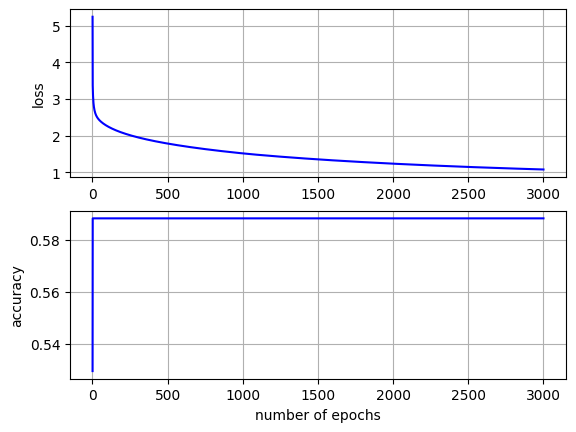

1/1 [==============================] - 0s 115ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

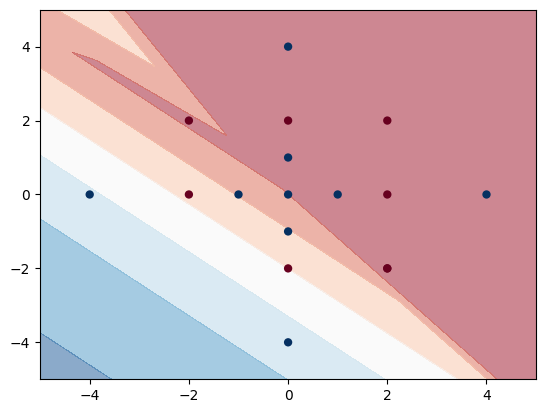

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_31.h5')

## loading cell

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 3)                 9         
                                                                 
 dense_28 (Dense)            (None, 1)                 4         
                                                                 
 dense_29 (Dense)            (None, 2)                 4         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 48ms/step
accuracy: 0.5882353186607361


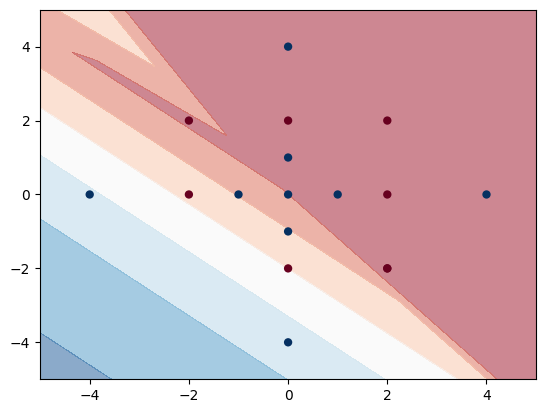

In [ ]:
# loading the best model
model = load_model('my_model_31.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 32

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 14ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 17ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 12ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 11ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 11ms/step - loss: 8.1661 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0

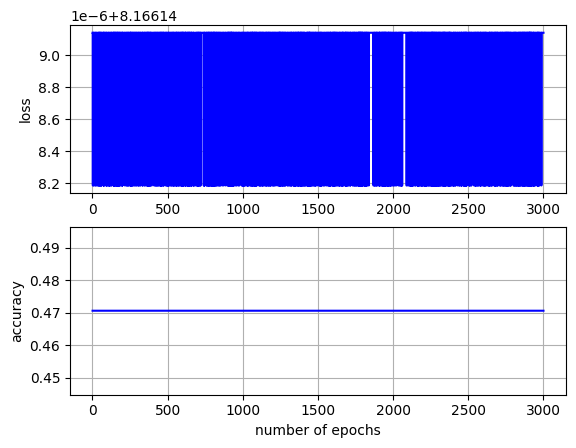

1/1 [==============================] - 0s 73ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

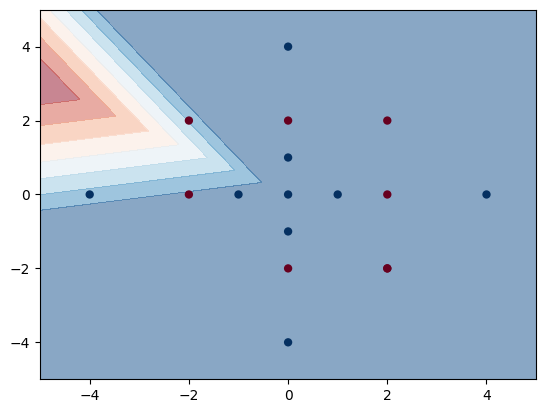

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_32.h5')

## loading cell

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 3)                 9         
                                                                 
 dense_52 (Dense)            (None, 2)                 8         
                                                                 
 dense_53 (Dense)            (None, 2)                 6         
                                                                 
Total params: 23 (92.00 Byte)
Trainable params: 23 (92.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 56ms/step
accuracy: 0.47058823704719543


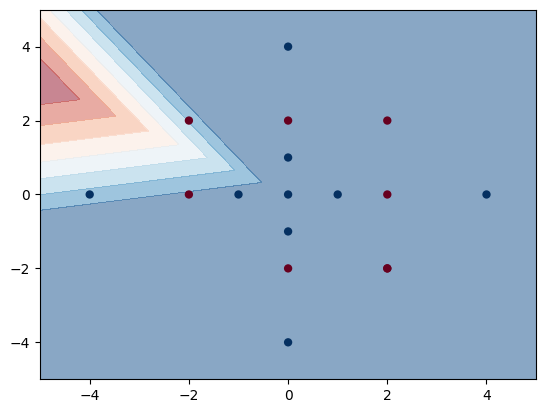

In [ ]:
# loading the best model
model = load_model('my_model_32.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 33

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 5.5862 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 13ms/step - loss: 5.5860 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 16ms/step - loss: 5.5857 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 12ms/step - loss: 5.5855 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 14ms/step - loss: 5.5853 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 13ms/step - loss: 5.5851 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.5849 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.5847 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 15ms/step - loss: 5.5844 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0

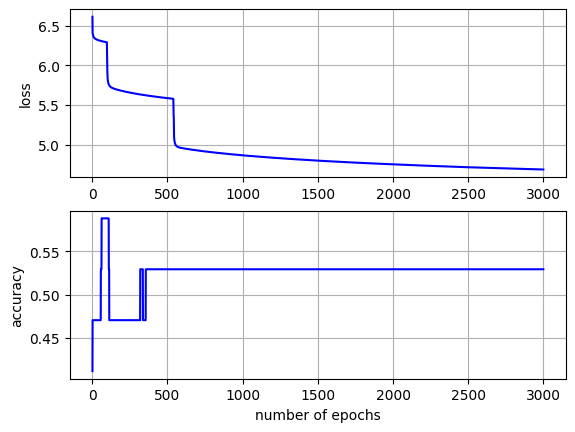

1/1 [==============================] - 0s 60ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

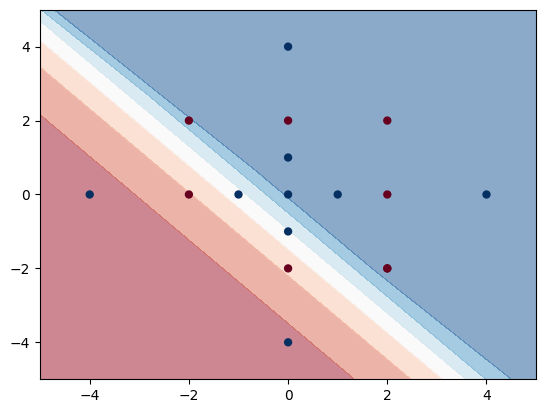

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_33.h5')

## loading cell

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 3)                 9         
                                                                 
 dense_46 (Dense)            (None, 3)                 12        
                                                                 
 dense_47 (Dense)            (None, 2)                 8         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 78ms/step


accuracy: 0.529411792755127


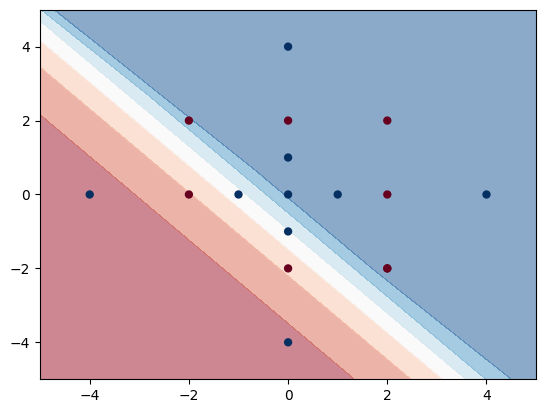

In [ ]:
# loading the best model
model = load_model('my_model_33.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 34

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 13ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 14ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 14ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.9291 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0

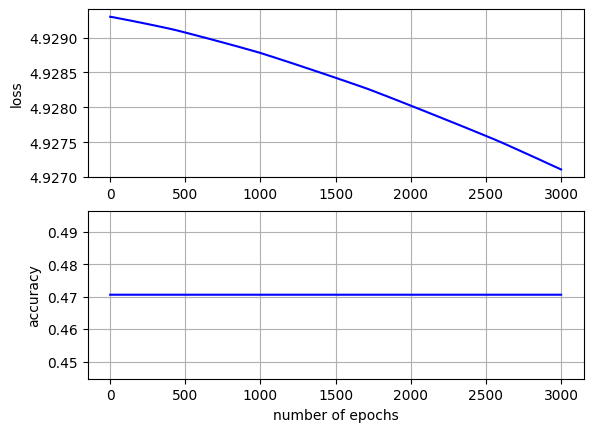

1/1 [==============================] - 0s 136ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

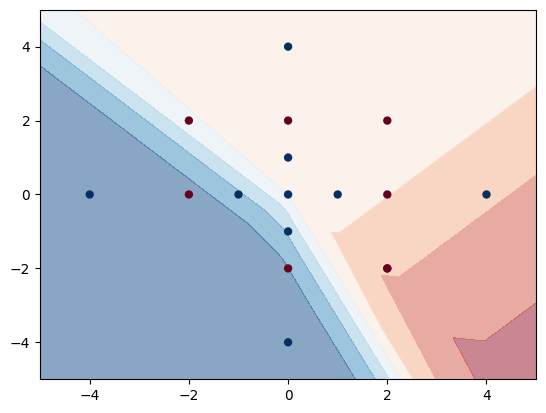

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_34.h5')

## loading cell

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 3)                 9         
                                                                 
 dense_40 (Dense)            (None, 4)                 16        
                                                                 
 dense_41 (Dense)            (None, 2)                 10        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 55ms/step


accuracy: 0.529411792755127


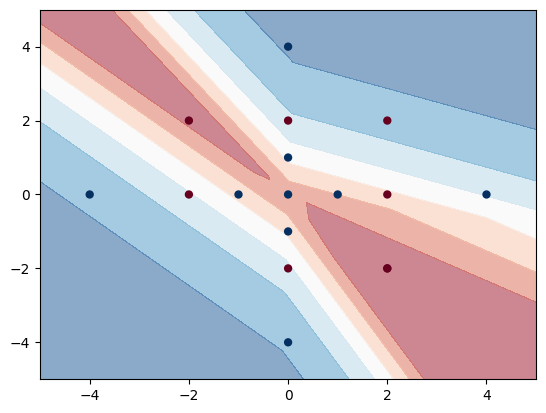

In [ ]:
# loading the best model
model = load_model('my_model_34.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 41

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 4.8276 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.8274 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.8271 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 13ms/step - loss: 4.8268 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.8266 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.8263 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.8261 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.8258 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 13ms/step - loss: 4.8255 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0s 1

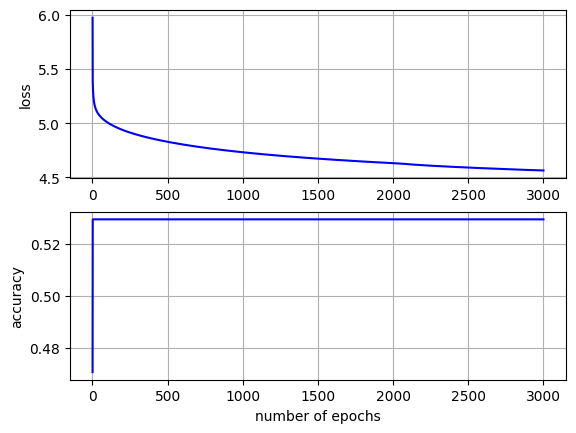

1/1 [==============================] - 0s 62ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

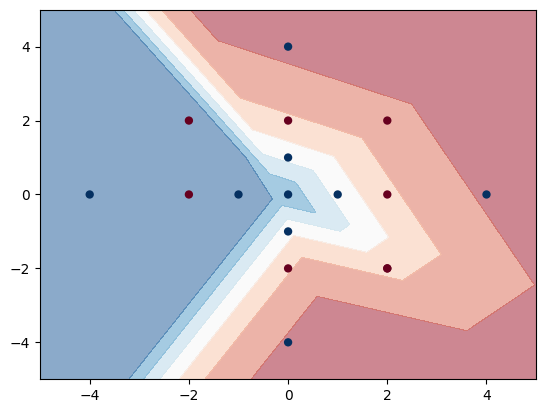

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# tarining
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_41.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## loading cell

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 dense_2 (Dense)             (None, 2)                 4         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 55ms/step
accuracy: 0.529411792755127


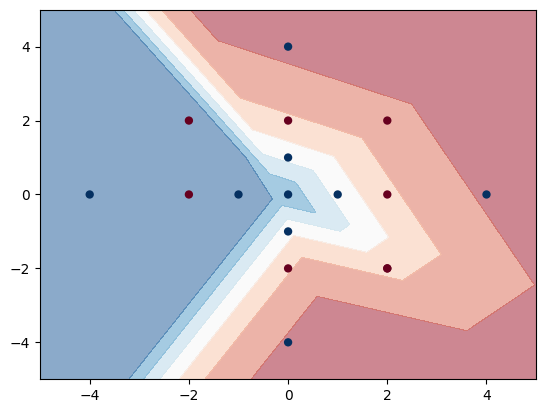

In [ ]:
# loading the best model
model = load_model('my_model_41.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 42

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 1.9281 - accuracy: 0.5882
Epoch 502/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.9274 - accuracy: 0.5882
Epoch 503/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.9267 - accuracy: 0.5882
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.9260 - accuracy: 0.5882
Epoch 505/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.9253 - accuracy: 0.5882
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.9246 - accuracy: 0.5882
Epoch 507/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.9240 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.9233 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.9226 - accuracy: 0.5882
Epoch 510/3000
1/1 [==============================] - 0s 9ms/

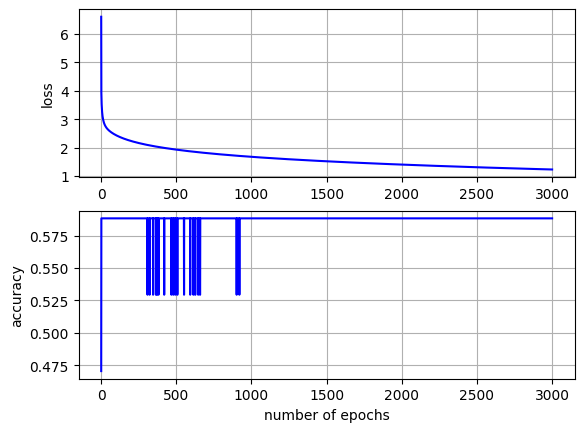

1/1 [==============================] - 0s 57ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

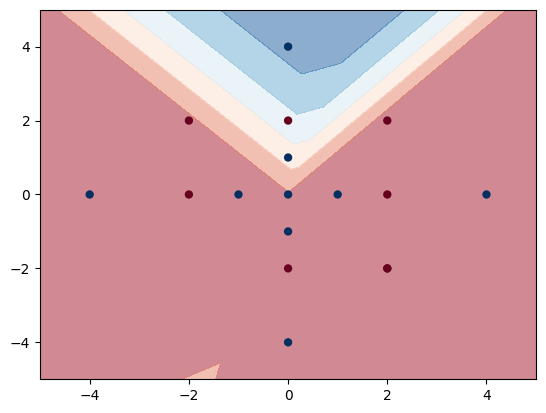

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_42.h5')

## loading cell

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 53ms/step
accuracy: 0.5882353186607361


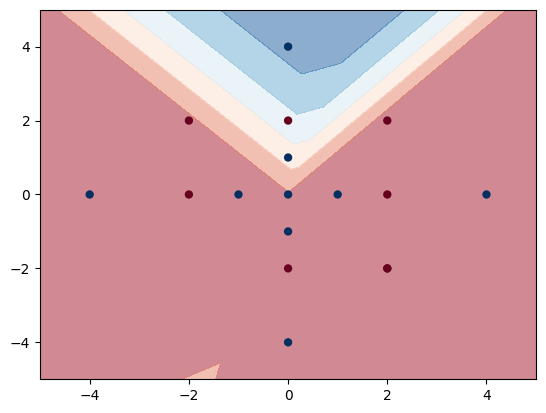

In [ ]:
# loading the best model
model = load_model('my_model_42.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 43

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 5.1242 - accuracy: 0.5294
Epoch 502/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1240 - accuracy: 0.5294
Epoch 503/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1237 - accuracy: 0.5294
Epoch 504/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1234 - accuracy: 0.5294
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1232 - accuracy: 0.5294
Epoch 506/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1229 - accuracy: 0.5294
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 5.1227 - accuracy: 0.5294
Epoch 508/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1224 - accuracy: 0.5294
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 5.1222 - accuracy: 0.5294
Epoch 510/3000
1/1 [==============================] - 0s 9m

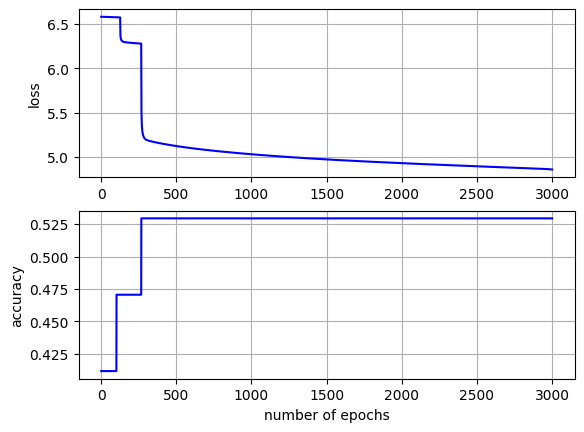

1/1 [==============================] - 0s 53ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

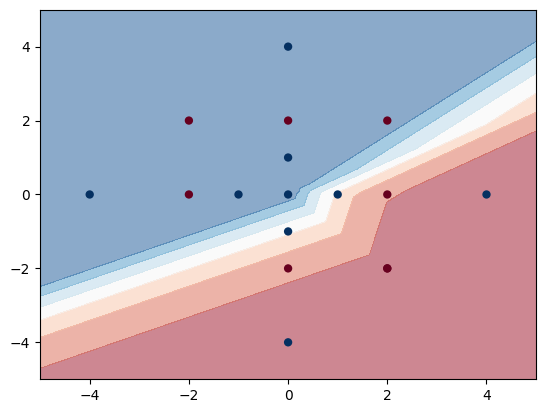

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_43.h5')

## loading cell

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 55ms/step
accuracy: 0.529411792755127


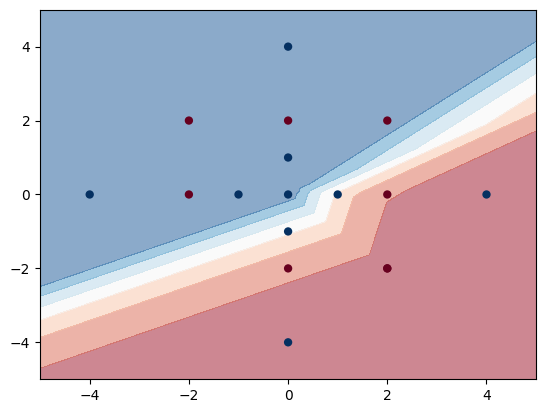

In [ ]:
# loading the best model
model = load_model('my_model_43.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

# 44

## training cell

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 4.3504 - accuracy: 0.4706
Epoch 502/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.3501 - accuracy: 0.4706
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 4.3498 - accuracy: 0.4706
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 4.3495 - accuracy: 0.4706
Epoch 505/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.3492 - accuracy: 0.4706
Epoch 506/3000
1/1 [==============================] - 0s 12ms/step - loss: 4.3490 - accuracy: 0.4706
Epoch 507/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.3487 - accuracy: 0.4706
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 4.3484 - accuracy: 0.4706
Epoch 509/3000
1/1 [==============================] - 0s 8ms/step - loss: 4.3481 - accuracy: 0.4706
Epoch 510/3000
1/1 [==============================] - 0s 9

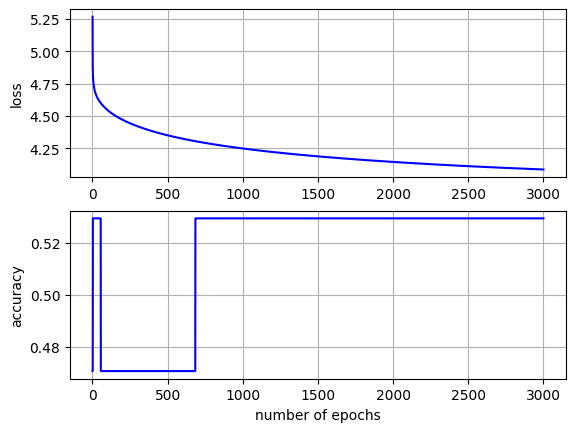

1/1 [==============================] - 0s 90ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

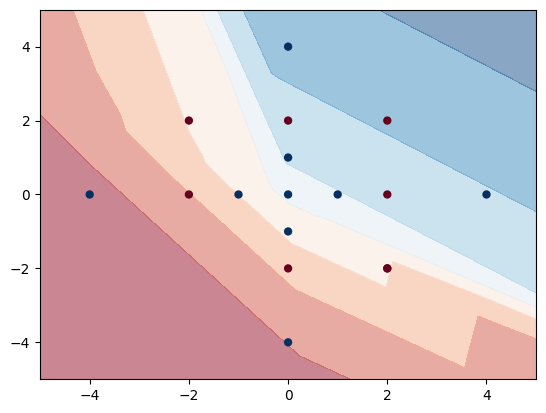

In [ ]:
# number of epochs
epochs = 3000
# building the structure of model
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))
# printing the summary of model
model.summary()
# chooseing cost function, optimizer and metric
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
# training
history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()
# plotting the boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [ ]:
# saving the model
model.save('my_model_44.h5')

## loading cell

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 4)                 12        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 2)                 10        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 72ms/step
accuracy: 0.529411792755127


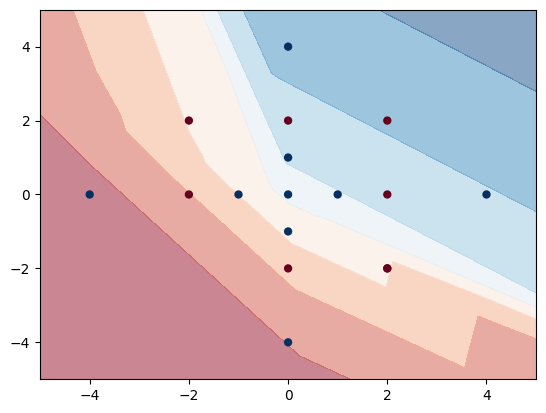

In [ ]:
# loading the best model
model = load_model('my_model_44.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

## model with more than 4 neourons in each layer

به نظر میرسد که مدل های با 4 نرون و کمتر در لایه هایشان نمی توانند دسته بندی درستی انجام دهند. از طرفی من فکر می کنم که تعداد کم داده نیز یکی از دلایل دیگر است. به سراغ مدل هایی با تعداد نرون های بیشتر می‌رویم

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step - loss: 0.0043 - accuracy: 0.3529
Epoch 502/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0070 - accuracy: 0.4118
Epoch 503/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0108 - accuracy: 0.4118
Epoch 504/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.0133 - accuracy: 0.4118
Epoch 505/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.0086 - accuracy: 0.4118
Epoch 506/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.0064 - accuracy: 0.3529
Epoch 507/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.0053 - accuracy: 0.2353
Epoch 508/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.0046 - accuracy: 0.2353
Epoch 509/3000
1/1 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 0.2353
Epoch 510/3000
1/1 [==============================] - 0

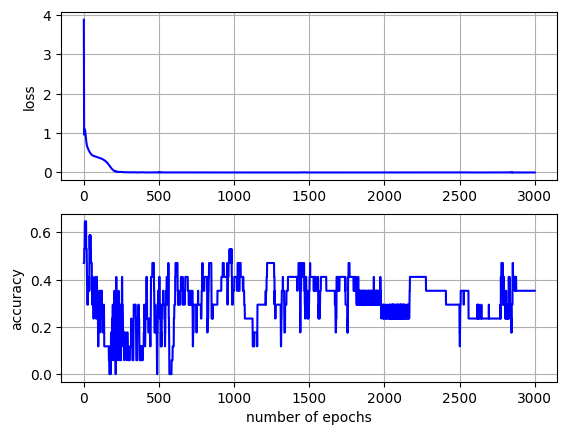

1/1 [==============================] - 0s 61ms/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

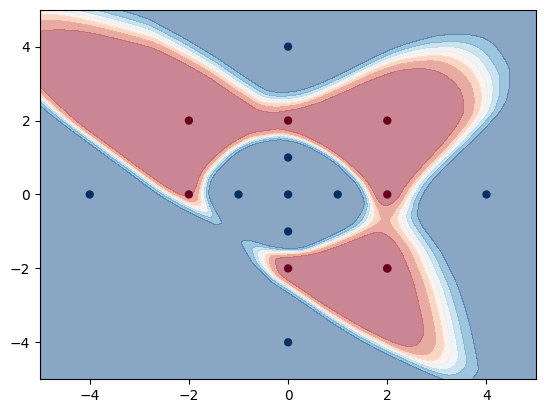

In [6]:
epochs = 3000

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(2,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(inputs, actual_outputs,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
# plotting the amount of loss and accuracy based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# accuracy part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('number of epochs')
plt.show()

plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')

In [7]:
model.save('my_model_4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


به نظر می رسد انسان اکر بخواهد خودش مرزبندی کند، حلقه ای سرخ در پسزمینه آبی انتخاب کند که نقاط را به خوبی پوشش دهند. اما مدل نمی تواند این را تشخیص دهد

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3072      
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 528898 (2.02 MB)
Trainable params: 528898 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 59ms/step
accuracy: 0.529411792755127


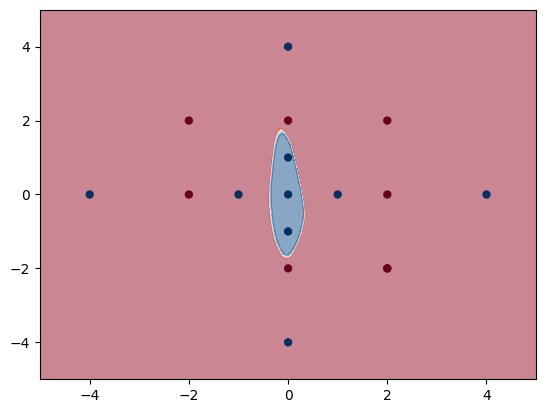

In [9]:
# loading the best model
model = load_model('my_model_1.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              3072      
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 528898 (2.02 MB)
Trainable params: 528898 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 64ms/step
accuracy: 0.529411792755127


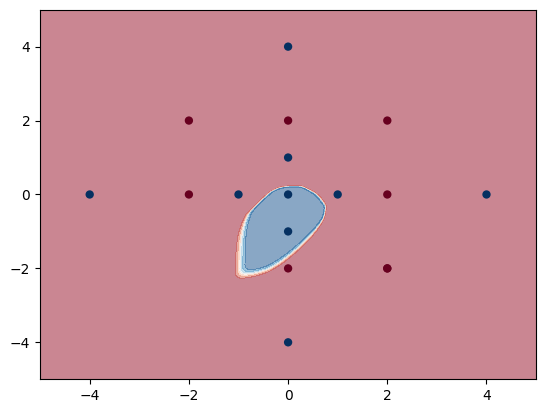

In [10]:
# loading the best model
model = load_model('my_model_2.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])

به نظر می رسد پلات مرزبندی مدل زیر به خوبی دسته بندی را انجام داده است، اما دقت پایینی دارد

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3072      
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 528898 (2.02 MB)
Trainable params: 528898 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 91ms/step
accuracy: 0.3529411852359772


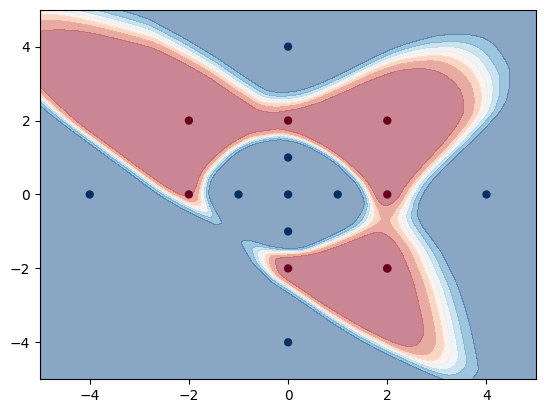

In [8]:
# loading the best model
model = load_model('my_model_3.h5')
# viewing the summary
model.summary()
# plotting boundaries
plot_decision_boundary(inputs, actual_outputs, model, cmap = 'RdBu')
# printing the accuracy on train data
score = model.evaluate(inputs, actual_outputs, verbose=0)
print('accuracy:', score[1])